In [2]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import pickle as pkl
import seaborn as sns
from scipy.misc import imsave

In [31]:
f = open('tmp/stats.pkl','rb')

In [32]:
stats = pkl.load(f)

In [33]:
stats.keys()

dict_keys(['p1', 'g_p1', 'diffs'])

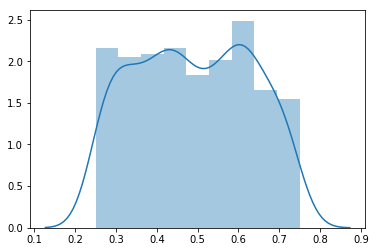

In [41]:
sns.distplot(stats['p1'])

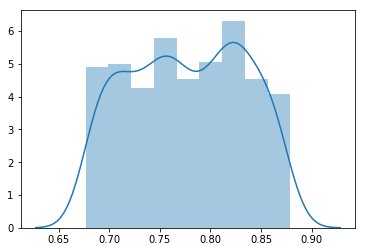

In [42]:
sns.distplot(stats['g_p1'])

Text(0, 0.5, 'Count')

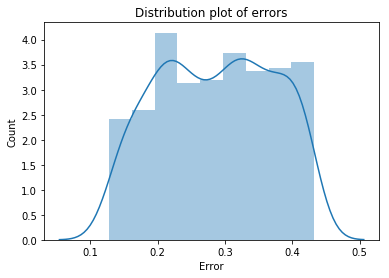

In [34]:
plt.figure()
plt.title('Distribution plot of errors')
sns.distplot(np.abs(stats['diffs']))
plt.xlabel('Error')
plt.ylabel('Count')

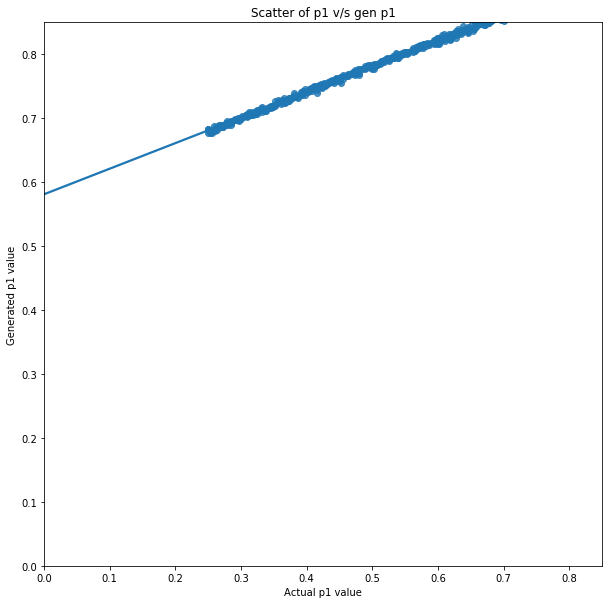

In [35]:
plt.figure(figsize=(10, 10))
plt.title('Scatter of p1 v/s gen p1')
plt.xlabel('Actual p1 value')
plt.ylabel('Generated p1 value')
plt.xlim([0,0.85])
plt.ylim([0,0.85])
sns.regplot(x=stats['p1'], y=stats['g_p1'], )

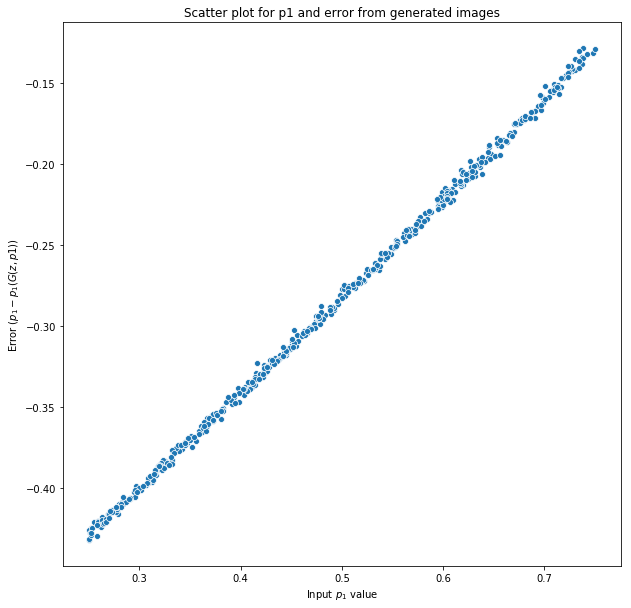

In [36]:
plt.figure(figsize=(10,10))
plt.title('Scatter plot for p1 and error from generated images')
plt.xlabel('Input $p_1$ value')
plt.ylabel('Error ($p_1 - p_1(G(z, p1)$)')
sns.scatterplot(x=stats['p1'], y=stats['diffs'])

In [37]:
sp.stats.describe(np.abs(stats['diffs']))

DescribeResult(nobs=500, minmax=(0.12804145, 0.4325146), mean=0.28708166, variance=0.00726614, skewness=-0.048759765923023224, kurtosis=-1.1601717561935385)

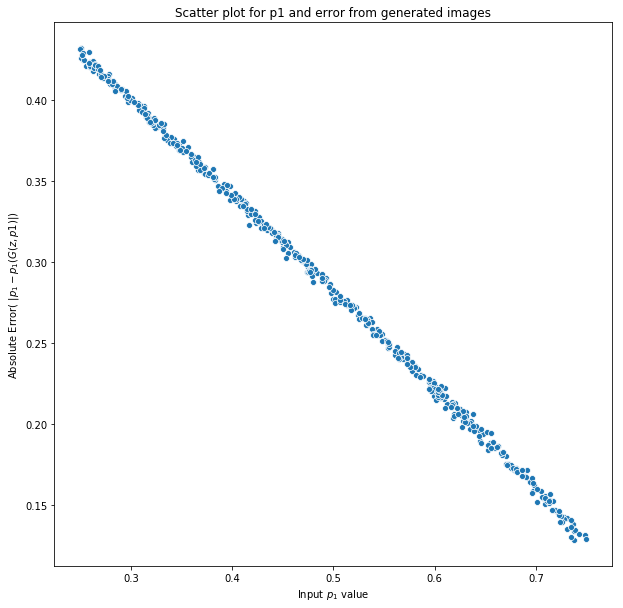

In [38]:
plt.figure(figsize=(10,10))
plt.title('Scatter plot for p1 and error from generated images')
plt.xlabel('Input $p_1$ value')
plt.ylabel('Absolute Error( $|p_1 - p_1(G(z, p1)|$)')
sns.scatterplot(x=stats['p1'], y=np.abs(stats['diffs']))

In [39]:
for i, j in zip(stats['p1'], stats['g_p1']):
    print(i,j)

0.54412043 0.7991872
0.630424 0.83479846
0.42348194 0.74781126
0.6728246 0.8478867
0.40313822 0.7458616
0.58366054 0.8173925
0.5953709 0.81815916
0.32559648 0.7093172
0.4165132 0.7496716
0.49271995 0.7827448
0.4453267 0.76325047
0.670351 0.8506576
0.43957093 0.7586912
0.37170678 0.72652435
0.51369226 0.78738856
0.4838066 0.7773397
0.37298733 0.73155785
0.5328517 0.7936867
0.47217768 0.7713355
0.29460496 0.6975337
0.25232887 0.6773815
0.5695793 0.81085336
0.47473955 0.77179885
0.64591104 0.839854
0.45057127 0.75985837
0.40418792 0.7420145
0.53250337 0.7936217
0.6170292 0.82746136
0.33188108 0.7147893
0.38089752 0.7385881
0.25027665 0.67661214
0.7170476 0.86378425
0.64763 0.84137475
0.3073844 0.70486367
0.6001176 0.82287157
0.5365605 0.8022824
0.27232963 0.6869622
0.34790295 0.71724236
0.37184027 0.72949255
0.3915758 0.7368789
0.5538227 0.80300283
0.6544779 0.84007335
0.31280106 0.70609975
0.32391757 0.7067449
0.42236686 0.7541025
0.40922737 0.74573183
0.3893525 0.73584247
0.37035003 0.7